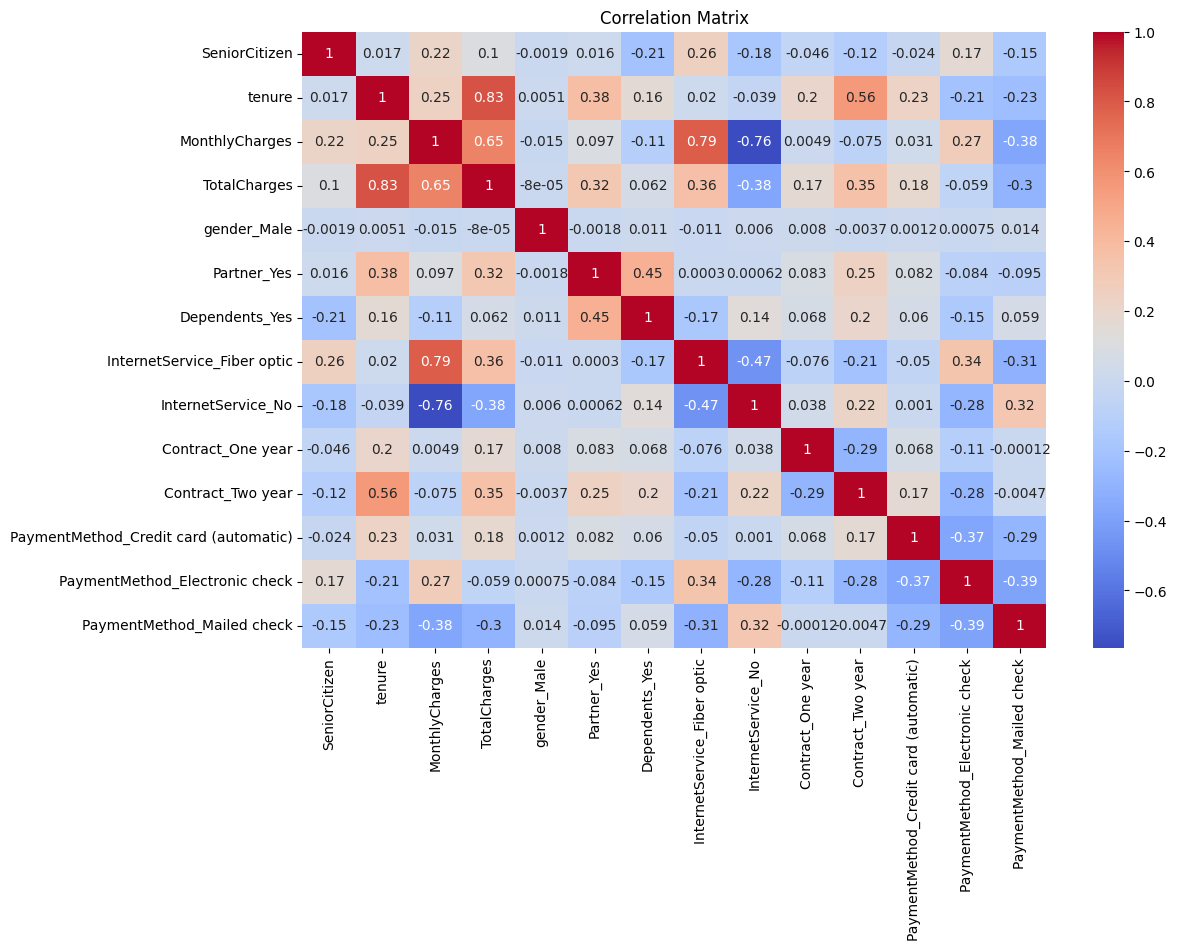

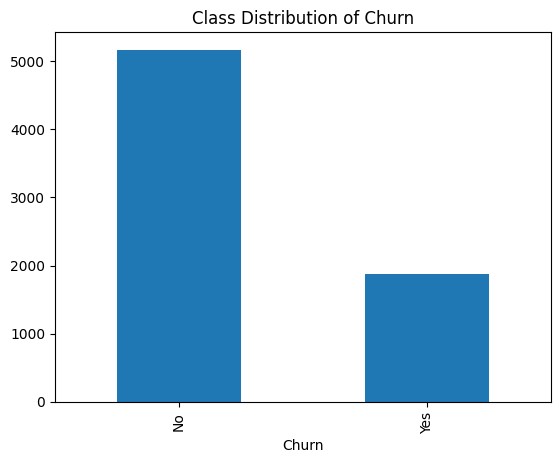

customerID                                object
SeniorCitizen                              int64
tenure                                   float64
PhoneService                              object
MultipleLines                             object
OnlineSecurity                            object
OnlineBackup                              object
DeviceProtection                          object
TechSupport                               object
StreamingTV                               object
StreamingMovies                           object
PaperlessBilling                          object
MonthlyCharges                           float64
TotalCharges                             float64
Churn                                     object
gender_Male                                 bool
Partner_Yes                                 bool
Dependents_Yes                              bool
InternetService_Fiber optic                 bool
InternetService_No                          bool
Contract_One year   

KeyError: 'Gender'

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
# Load your preprocessed data
file_path = '/Users/rajhabib/customer-churn-prediction/data/preprocessed_data.csv'
df = pd.read_csv(file_path)

# List of non-numeric columns to exclude
non_numeric_columns = ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']

# Filter out non-numeric columns
numeric_columns = [col for col in df.columns if col not in non_numeric_columns]

# Compute correlation matrix for numeric columns
corr_matrix = df[numeric_columns].corr()

# Plot correlations
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

df['Churn'].value_counts().plot(kind='bar')
plt.title('Class Distribution of Churn')
plt.show()

# Assuming df is your DataFrame
print(df.dtypes)  # Check initial data types

# Convert 'TotalCharges' to numeric if needed
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Confirm the data types again
print(df.dtypes)

# Select only numeric columns for groupby operation
numeric_df = df.select_dtypes(include=[np.number])

# Perform groupby operation on numeric columns
grouped_df = numeric_df.groupby(df['Churn']).mean()

print(grouped_df)

categorical_features = ['Gender', 'Partner', 'Dependents']
for feature in categorical_features:
    df[feature].value_counts().plot(kind='bar')
    plt.title(f'Distribution of {feature}')
    plt.show()
